C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


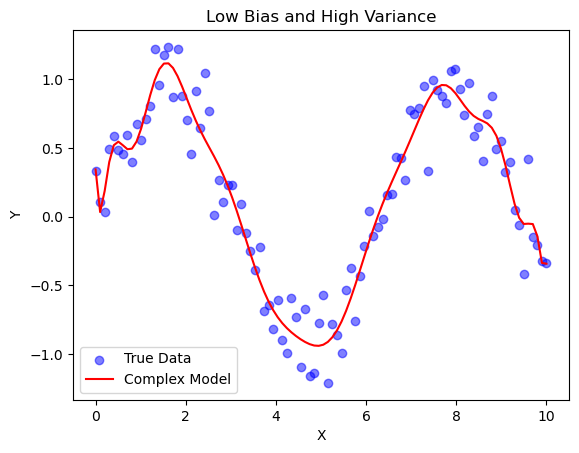

In [1]:
import numpy as np
import matplotlib.pyplot as plt



C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


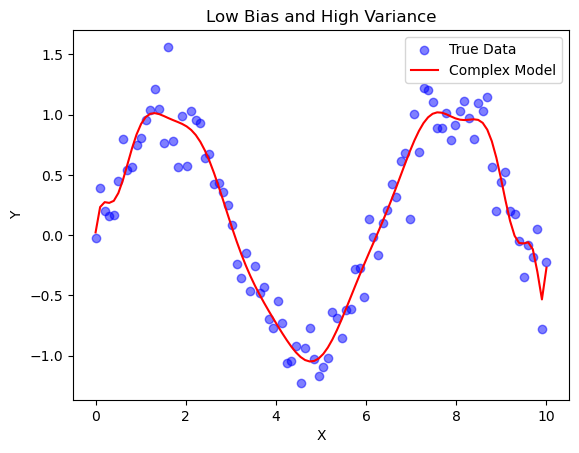

In [2]:
# Generate data points with noise
x = np.linspace(0, 10, 100)
y_true = np.sin(x) + np.random.normal(0, 0.2, size=100)

# Fit a complex model with high variance
degree = 20
coeffs = np.polyfit(x, y_true, degree)
y_pred = np.polyval(coeffs, x)

# Plot the data points and the model predictions
plt.scatter(x, y_true, label='True Data', color='blue', alpha=0.5)
plt.plot(x, y_pred, label='Complex Model', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Low Bias and High Variance')
plt.legend()
plt.show()

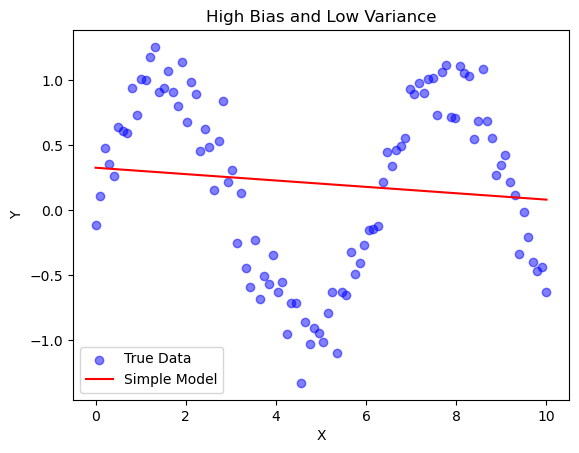

In [7]:
# Generate data points
x = np.linspace(0, 10, 100)
y_true = np.sin(x) + np.random.normal(0, 0.2, size=100)

# Fit a simple model with high bias
degree = 1
coeffs = np.polyfit(x, y_true, degree)
y_pred = np.polyval(coeffs, x)

# Plot the data points and the model predictions
plt.scatter(x, y_true, label='True Data', color='blue', alpha=0.5)
plt.plot(x, y_pred, label='Simple Model', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('High Bias and Low Variance')
plt.legend()
plt.show()

In [21]:
# Generate some random data
X = np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)

# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
y_pred = lin_reg.predict(X)

# Calculate the bias
bias = np.mean(y_pred - y)

print("Actual values: ", y[:5])
print("Predicted values: ", y_pred[:5])
print("Bias: ", bias)

Actual values:  [[5.92486844]
 [6.81031445]
 [6.26475712]
 [5.61024027]
 [5.96377877]]
Predicted values:  [[5.73388637]
 [5.60903105]
 [6.8999132 ]
 [5.85046724]
 [6.4096037 ]]
Bias:  1.021405182655144e-16


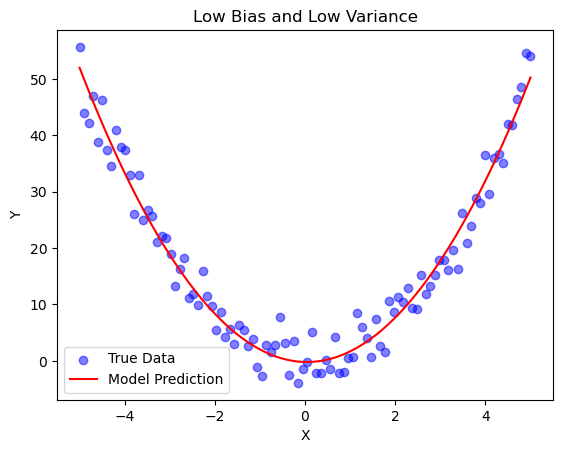

In [31]:
# Generate data points
x = np.linspace(-5, 5, 100)
y_true = 2 * x**2 + np.random.normal(0, 3, size=100)

# Fit a well-generalizing parabolic model
coeffs = np.polyfit(x, y_true, deg=2)
y_pred = np.polyval(coeffs, x)

# Plot the data points and the model predictions
plt.scatter(x, y_true, label='True Data', color='blue', alpha=0.5)
plt.plot(x, y_pred, label='Model Prediction', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Low Bias and Low Variance')
plt.legend()
plt.show()

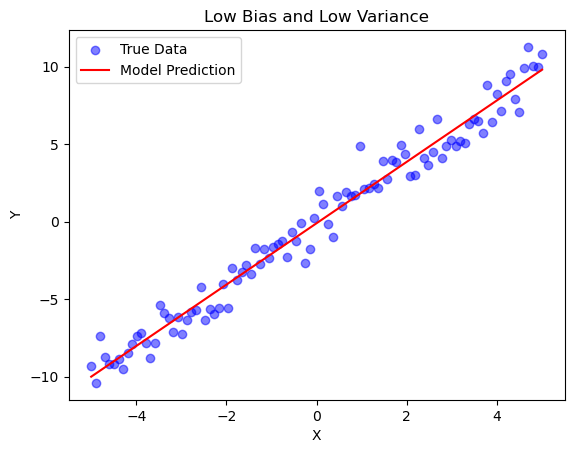

In [18]:
# Generate data points
x = np.linspace(-5, 5, 100)
y_true = 2 * x + np.random.normal(0, 1, size=100)

# Fit a well-generalizing model
coeffs = np.polyfit(x, y_true, deg=1)
y_pred = np.polyval(coeffs, x)

# Plot the data points and the model predictions
plt.scatter(x, y_true, label='True Data', color='blue', alpha=0.5)
plt.plot(x, y_pred, label='Model Prediction', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Low Bias and Low Variance')
plt.legend()
plt.show()

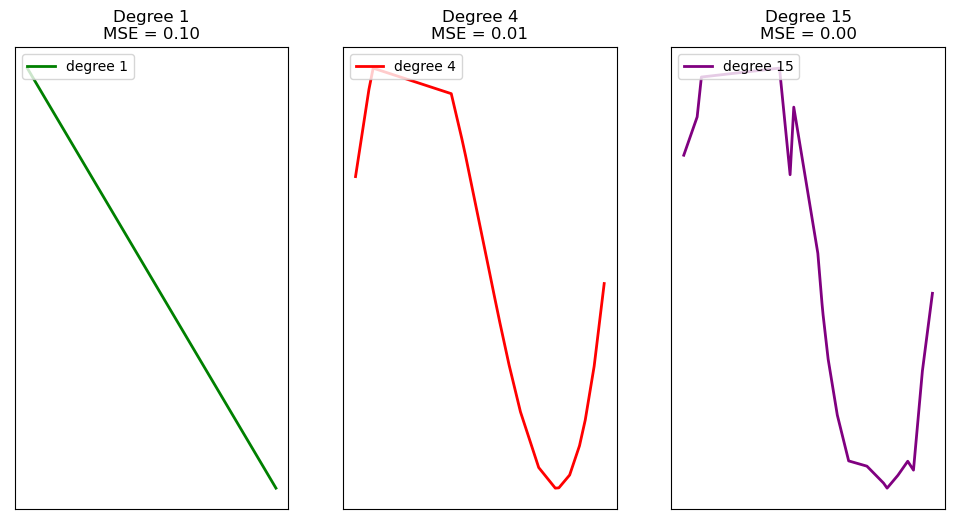

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some random data
np.random.seed(0)
n_samples = 20
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

# Fit models of different degrees
degrees = [1, 4, 15]
colors = ['green', 'red', 'purple']
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black')
plt.ylim(-1.5, 1.5)
plt.legend(['Data points'], loc='lower right')
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    model = LinearRegression()
    model.fit(np.vander(X, degree + 1), y)
    y_pred = model.predict(np.vander(X, degree + 1))
    plt.plot(X, y_pred, color=colors[i], linewidth=2,
             label="degree %d" % degree)
    plt.legend(loc='upper left')
    plt.title("Degree {}\nMSE = {:.2f}".format(
        degree, mean_squared_error(y, y_pred)))
plt.show()

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

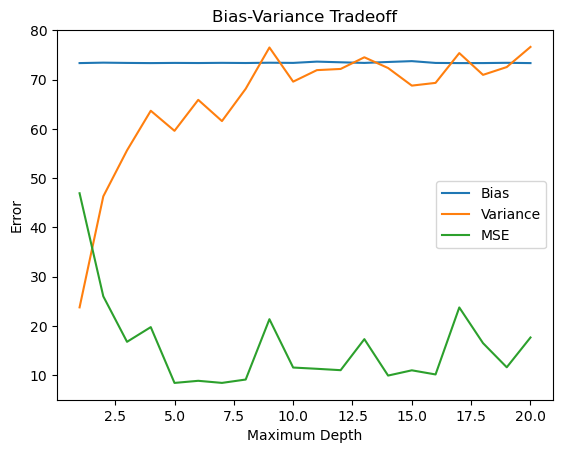

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to calculate bias, variance, and mean squared error
def calculate_bias_variance(model, X, y):
    y_pred = model.predict(X)
    bias = np.mean((y - np.mean(y_pred)) ** 2)
    variance = np.mean(np.var(y_pred))
    mse = mean_squared_error(y, y_pred)
    return bias, variance, mse

# Vary the maximum depth of the decision tree
max_depth_values = range(1, 21)
bias_values = []
variance_values = []
mse_values = []

# Train decision tree models with different maximum depths
for depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    bias, variance, mse = calculate_bias_variance(model, X_test, y_test)
    bias_values.append(bias)
    variance_values.append(variance)
    mse_values.append(mse)

# Plot the bias-variance tradeoff
plt.plot(max_depth_values, bias_values, label='Bias')
plt.plot(max_depth_values, variance_values, label='Variance')
plt.plot(max_depth_values, mse_values, label='MSE')
plt.xlabel('Maximum Depth')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

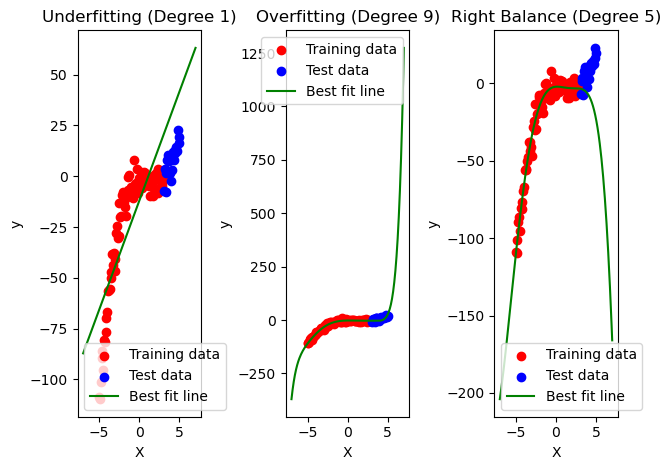

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**3 - 2 * X**2 + 1 * X + np.random.normal(0, 5, X.shape[0]).reshape(-1, 1)

# Split the data into training and test sets
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Function to fit and evaluate a polynomial regression model
def fit_polynomial(degree):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict on training and test data
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate mean squared error
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    return train_error, test_error, model

# Fit models with varying degrees of polynomial features
degrees = [1, 5, 9]

# Plotting underfitting
plt.subplot(1, 3, 1)
degree_underfit = degrees[0]
train_error_underfit, test_error_underfit, model_underfit = fit_polynomial(degree_underfit)
X_plot = np.linspace(-7, 7, 200).reshape(-1, 1)
X_plot_poly = PolynomialFeatures(degree_underfit).fit_transform(X_plot)
y_plot = model_underfit.predict(X_plot_poly)
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_plot, y_plot, color='green', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Underfitting (Degree {})'.format(degree_underfit))
plt.legend()

# Plotting overfitting
plt.subplot(1, 3, 2)
degree_overfit = degrees[2]
train_error_overfit, test_error_overfit, model_overfit = fit_polynomial(degree_overfit)
X_plot = np.linspace(-7, 7, 200).reshape(-1, 1)
X_plot_poly = PolynomialFeatures(degree_overfit).fit_transform(X_plot)
y_plot = model_overfit.predict(X_plot_poly)
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_plot, y_plot, color='green', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting (Degree {})'.format(degree_overfit))
plt.legend()

# Plotting right balance
plt.subplot(1, 3, 3)
degree_right_balance = degrees[1]
train_error_right_balance, test_error_right_balance, model_right_balance = fit_polynomial(degree_right_balance)
X_plot = np.linspace(-7, 7, 200).reshape(-1, 1)
X_plot_poly = PolynomialFeatures(degree_right_balance).fit_transform(X_plot)
y_plot = model_right_balance.predict(X_plot_poly)
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_plot, y_plot, color='green', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Right Balance (Degree {})'.format(degree_right_balance))
plt.legend()

plt.tight_layout()
plt.show()

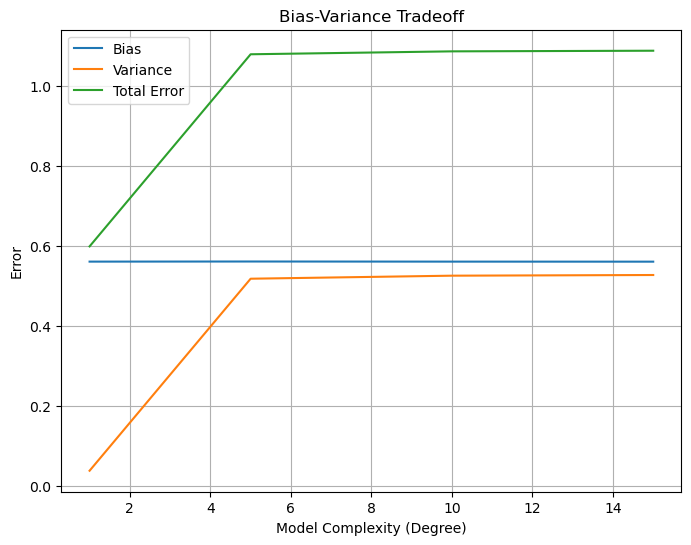

In [32]:
# Generate synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y_true = np.sin(X) + np.random.normal(0, 0.2, size=X.shape)

# Polynomial regression models of varying degrees
degrees = [1, 5, 10, 15]
total_errors = []
biases = []
variances = []

for degree in degrees:
    # Fit the polynomial regression model
    X_poly = np.column_stack([X**i for i in range(1, degree+1)])
    model = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_true

    # Predict on the training data
    y_pred = X_poly @ model

    # Calculate bias, variance, and total error
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean(np.var(y_pred))
    total_error = bias + variance

    biases.append(bias)
    variances.append(variance)
    total_errors.append(total_error)
    
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(degrees, biases, label='Bias')
plt.plot(degrees, variances, label='Variance')
plt.plot(degrees, total_errors, label='Total Error')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()